least Square Test1

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [3]:
## object fun
def object_func(x):
    return np.sin(2*np.pi*x)

## fit fun
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)
## residule fun
def residules_func(p,x,y):
    return fit_func(p,x) -y
    


In [17]:
x_s=np.linspace(0,1,10)
y_s=object_func(x_s)
x_new=np.linspace(0,1,100)
y_s_e=[np.random.normal(0,0.1)+y1 for y1 in y_s]


In [18]:
p0=np.random.rand(4)
para0=leastsq(residules_func,p0,(x_s,y_s_e))[0]

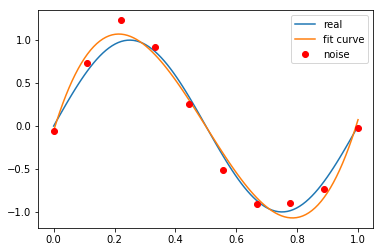

In [22]:
plt.plot(x_new,object_func(x_new),label='real')
plt.plot(x_new,fit_func(para0,x_new),label='fit curve')
# plt.plot(x_new,fit_func(para0,x_new),label='fit curve')
plt.plot(x_s,y_s_e,'ro',label='noise')
plt.legend()
plt.show()

regulation:
L1: regularization*abs(p)
L2: 0.5 * regularization * np.square(p)

In [35]:
regularization=0.0001

In [40]:
def residules_regu_func(p,x,y):
    ret=fit_func(p,x)-y
    return np.append(ret,np.sqrt(0.5*regularization*np.square(p)))

In [55]:
para0

array([ 23.01104145, -34.46295118,  11.58018357,  -0.0547061 ])

In [37]:
np.sqrt(0.5*regularization*np.square(para0))

array([0.16271263, 0.24368986, 0.08188426, 0.00038683])

In [54]:
a=[1,2,3]
a.append(np.sqrt(0.5*regularization*np.square(para0)))
a

[1, 2, 3, array([0.16271263, 0.24368986, 0.08188426, 0.00038683])]

In [57]:
sum(a)

array([6.16271263, 6.24368986, 6.08188426, 6.00038683])

In [58]:
b=[1,2,3]
b+np.sqrt(0.5*regularization*np.square(para0))

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [42]:
p1=np.random.rand(4)

In [43]:
para1=leastsq(residules_regu_func,p1,args=(x_s,y_s))[0]

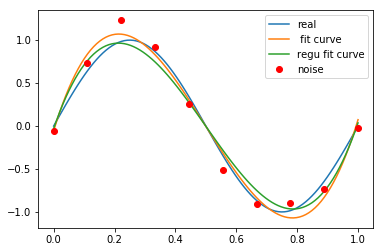

In [46]:
plt.plot(x_new,object_func(x_new),label='real')
plt.plot(x_new,fit_func(para0,x_new),label=' fit curve')
plt.plot(x_new,fit_func(para1,x_new),label='regu fit curve')
plt.plot(x_s,y_s_e,'ro',label='noise')
plt.legend()
plt.show()